In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
%matplotlib inline

In [2]:
img = cv2.imread('clocks/clock2.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [3]:
sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)
kp1, des1 = sift.detectAndCompute(gray,None)
img=cv2.drawKeypoints(gray,kp1,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

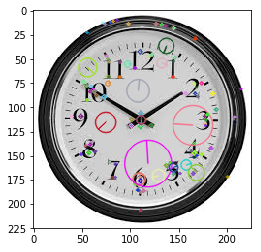

In [4]:
plt.imshow(img, cmap='gray')

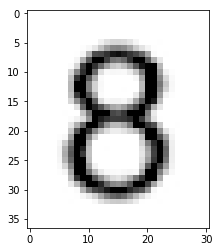

In [5]:
hay_img = 'clocks/num8.png'
hay_img = cv2.cvtColor(cv2.imread(hay_img), cv2.COLOR_BGR2GRAY)
hay_edges = cv2.Canny(hay_img,100,200)

plt.imshow(hay_img, cmap='gray')
num2 = hay_img

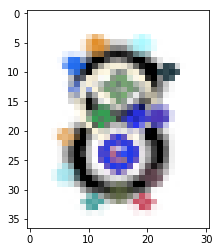

In [6]:
sift2 = cv2.xfeatures2d.SIFT_create()
kp2, des2 = sift2.detectAndCompute(num2,None)
img2=cv2.drawKeypoints(num2,kp2,num2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img2, cmap='gray')

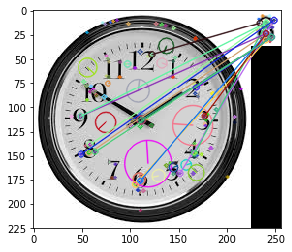

(<matplotlib.image.AxesImage at 0x1185a2410>, None)

In [7]:
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
# Match descriptors.
matches = bf.match(des1,des2)
#Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# # Apply ratio test
# good = []
# for m,n in matches:
#     if m.distance < 0.75*n.distance:
#         good.append([m])
# Draw first 10 matches.
img3 = cv2.drawMatches(img,kp1,img2,kp2,matches[:15], None,flags=2)
plt.imshow(img3),plt.show()

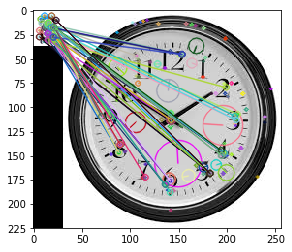

(<matplotlib.image.AxesImage at 0x11847b1d0>, None)

In [8]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des2,des1, k=3)
# Apply ratio test
good = []
for pts in matches:
#     if m.distance < 0.75*n.distance:
    good.append([x for x in pts if x.distance < pts[0].distance * 1.3])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img2,kp2,img,kp1,good,None,flags=2)
plt.imshow(img3),plt.show()

In [9]:
good

[[<DMatch 0x1177e8150>],
 [<DMatch 0x1177dfe50>],
 [<DMatch 0x1177dfb70>],
 [<DMatch 0x1177dffd0>],
 [<DMatch 0x1177dfb10>],
 [<DMatch 0x1177df490>],
 [<DMatch 0x1177df3f0>, <DMatch 0x1177dffb0>, <DMatch 0x1177df470>],
 [<DMatch 0x1177dfa50>, <DMatch 0x1177dfdb0>, <DMatch 0x1177dfa10>],
 [<DMatch 0x1177dfb30>, <DMatch 0x1177df650>, <DMatch 0x1177dff10>],
 [<DMatch 0x1177df6d0>, <DMatch 0x1177dff30>, <DMatch 0x1177df710>],
 [<DMatch 0x1177dfdd0>, <DMatch 0x1177dfef0>, <DMatch 0x1177dfeb0>],
 [<DMatch 0x1177df890>, <DMatch 0x1177dfc50>, <DMatch 0x1177df8f0>],
 [<DMatch 0x1177dfb50>, <DMatch 0x1177dfe70>, <DMatch 0x1177dfaf0>],
 [<DMatch 0x1177dfe30>, <DMatch 0x1177dfa30>, <DMatch 0x1177df950>],
 [<DMatch 0x1177df610>, <DMatch 0x1177df590>, <DMatch 0x1177df510>],
 [<DMatch 0x1177df930>, <DMatch 0x1177df670>, <DMatch 0x1177df4d0>],
 [<DMatch 0x1177df830>, <DMatch 0x1177dfa70>, <DMatch 0x1177df570>],
 [<DMatch 0x1177df6f0>, <DMatch 0x1177df450>, <DMatch 0x1177df690>],
 [<DMatch 0x1177dfbd0>

In [10]:
from collections import defaultdict
def extract_matches(match_list_matrix, kp_1, kp_2):
    result = defaultdict(list)
    if len(match_list_matrix):
        if isinstance(match_list_matrix[0], list):
            for dmatch_list in match_list_matrix:
                for dmatch in dmatch_list:
                    #print(dmatch.trainIdx)
                    result[kp_2[dmatch.trainIdx]].append(dmatch)
        else:
            for dmatch in match_list_matrix:
                result[kp_2[dmatch.trainIdx]].append(dmatch)
    return result

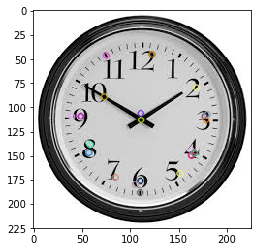

(<matplotlib.image.AxesImage at 0x1187e4e10>, None)

In [11]:
result = extract_matches(good, kp2, kp1)
img4=cv2.drawKeypoints(gray,result.keys(), None)
plt.imshow(img4),plt.show()

In [12]:
good_matched_kp = sorted(result.keys(), key=lambda x: min([dmatch.distance for dmatch in result[x]]))[:20]

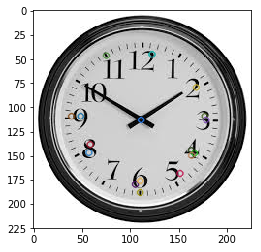

(<matplotlib.image.AxesImage at 0x1058afcd0>, None)

In [13]:
img5=cv2.drawKeypoints(gray,good_matched_kp, None)
plt.imshow(img5),plt.show()

In [14]:
len(good_matched_kp)

20

In [15]:
import pickle
contours = pickle.load(open('contours.pk'))

In [16]:
from collections import defaultdict
bb_map = defaultdict(int)
for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    bb_map[(x, y, w, h)] = 0

In [17]:
for good_kp in good_matched_kp:
    x_, y_ = good_kp.pt
    for x, y,  w, h in bb_map:
        if x_ >= x and x_ <= x + w and y_ >= y and y_ <= y + h:
            #print('aha')
            bb_map[(x, y, w, h)] += 1

In [18]:
candidate_bb = []
for bb, score in sorted(bb_map.items(), key=lambda x: -x[1]):
    x, y, w, h = bb
    if max(w, h) > max(img.shape)/3 or not score:
        continue
    candidate_bb.append(bb)
#     if len(candidate_bb) > 10:
#         break

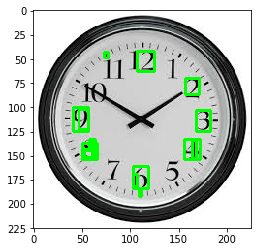

In [19]:
img = cv2.imread('clocks/clock2.png')
for x, y, w, h in candidate_bb:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)
plt.show()

In [20]:
# return positive number if there's overlap, o/w return negative number of their distance
def overlap_bw_segment(line1, line2):
    a1, a2 = line1
    b1, b2 = line2
    if a2 <= b1:
        return a2 - b1
    if a1 >= b2:
        return b2 - a1
    return min(a2, b2) - max(a1, b1)

def decide_merge(bb1, bb2, overlap_ratio):
    x1, y1, w1, h1 = bb1
    x2, y2, w2, h2 = bb2
    x_overlap = overlap_bw_segment((x1, x1+w1), (x2, x2+w2))
    print(x_overlap)
    y_overlap = overlap_bw_segment((y1, y1+h1), (y2, y2+h2))
    print(y_overlap)
    x_ratio = x_overlap*1.0 / min(w1, w2)
    y_ratio = y_overlap*1.0/ min(h1, h2)
    print(x_ratio)
    print(y_ratio)
    return min(x_ratio, y_ratio) >= -(1 - overlap_ratio) and max(x_ratio, y_ratio) >= overlap_ratio

def merge_two_bb(bb1, bb2):
    x1, y1, w1, h1 = bb1
    x2, y2, w2, h2 = bb2
    new_x = min(x1, x2)
    new_y = min(y1, y2)
    new_w = max(x1 + w1, x2 + w2) - new_x
    new_h = max(y1 + h1, y2 + h2) - new_y
    return new_x, new_y, new_w, new_h
    
def merge_bb(bb_list, overlap_ratio=0.6):
    new_bb_list = []
    while True:
        merged_idx = set()
        new_bb_list = []
        for i in range(len(bb_list)):
            if i in merged_idx: continue
            for j in range(i+1, len(bb_list)):
                if j in merged_idx: continue
                if decide_merge(bb_list[i], bb_list[j], overlap_ratio):
                    merged_idx.add(i)
                    merged_idx.add(j)
                    new_bb_list.append(merge_two_bb(bb_list[i], bb_list[j]))
                    break
        if not new_bb_list: break
        bb_list = [bb_list[i] for i in range(len(bb_list)) if i not in merged_idx] + new_bb_list
    return bb_list

In [21]:
merged_candidate_bb = merge_bb(candidate_bb)

-37
-7
-2.3125
-0.333333333333
-46
-38
-4.6
-1.80952380952
12
-98
0.75
-4.66666666667
-46
-36
-2.875
-1.5652173913
-49
-36
-3.26666666667
-1.63636363636
-37
-7
-2.46666666667
-0.411764705882
-41
-21
-10.25
-4.2
-26
-112
-6.5
-18.6666666667
3
-2
1.0
-0.333333333333
-99
-10
-9.9
-0.47619047619
-31
-70
-1.9375
-3.33333333333
-99
-8
-6.1875
-0.380952380952
4
-8
0.266666666667
-0.380952380952
-90
17
-6.0
1.0
-94
5
-23.5
1.0
-79
-84
-19.75
-14.0
-49
-15
-12.25
-1.15384615385
-92
8
-15.3333333333
1.0
4
19
1.0
1.0
-50
-39
-5.0
-1.85714285714
10
21
1.0
1.0
-43
-40
-2.86666666667
-1.90476190476
-41
-74
-2.73333333333
-4.35294117647
-45
-72
-11.25
-14.4
-30
6
-7.5
1.0
0
-106
0.0
-8.15384615385
-43
-70
-7.16666666667
-8.75
-46
-82
-4.6
-9.11111111111
-43
-80
-3.90909090909
-8.88888888889
-32
-7
-2.28571428571
-0.411764705882
-102
-12
-6.8
-0.705882352941
-106
-10
-26.5
-2.0
-91
-54
-22.75
-9.0
-61
-44
-15.25
-3.38461538462
-104
-8
-17.3333333333
-1.0
-107
-20
-10.7
-2.22222222222
-104
-18
-9.45454

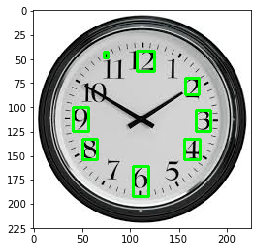

In [22]:
img = cv2.imread('clocks/clock2.png')
for x, y, w, h in merged_candidate_bb:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)
plt.show()

In [23]:
merged_candidate_bb

[(107, 42, 18, 21),
 (168, 103, 15, 22),
 (73, 43, 4, 6),
 (157, 70, 14, 17),
 (156, 133, 16, 21),
 (41, 100, 16, 25),
 (103, 161, 16, 31),
 (51, 133, 15, 21)]

In [24]:
def get_contours(edges, bb=None):
    if bb is not None:
        x, y, w, h = bb
        edges = edges[y:y+h, x:x+w]
#     return edges
    return cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [25]:
img = cv2.imread('clocks/clock2.png', 0)
edges = cv2.Canny(img,100,200) #TODO tune here
i1, hay_contours, _ = get_contours(hay_edges)
# a = cv2.HuMoments(cv2.moments(hay_img)).flatten()
distance_extractor = cv2.createShapeContextDistanceExtractor()
for bb in merged_candidate_bb:
    i2, partial_edges, _ = get_contours(edges, bb)
#     b = cv2.HuMoments(cv2.moments(partial_edges)).flatten()
#     dist = cosine(a, b)
    dist = distance_extractor.computeDistance(np.concatenate(partial_edges), np.concatenate(hay_contours))
    
    print(dist)
#     break

0.223667398095
0.193914011121
0.171428531408
0.269917488098
1.80186629295
0.323821544647
0.861033737659
0.361533552408


In [26]:
from shape_context import ShapeContext
sc = ShapeContext()

In [27]:
num_7 = cv2.bitwise_not(hay_img)

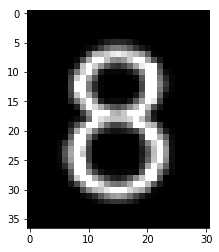

In [28]:
plt.imshow(num_7, cmap='gray')

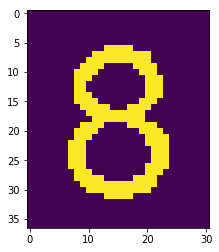

In [29]:
#_, num_7 = cv2.threshold(num_7, 30, 255, cv2.THRESH_BINARY)
#plt.imshow(num_7, cmap='gray')
num_7 = cv2.bitwise_not(hay_img)
dst = cv2.adaptiveThreshold(num_7, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 0)
plt.imshow(dst)

In [30]:
pts = sc.get_points_from_img(dst, simpleto=50)
descriptor = sc.compute(pts).flatten()
len(descriptor)

3000

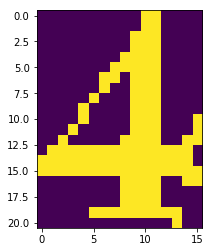

In [31]:
def get_croped(img, bb):
    dst = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 0)
    dst = cv2.bitwise_not(dst)
    x, y, w, h = bb
    return dst[y:y+h, x:x+w]
img = cv2.imread('clocks/clock2.png', 0)
croped = get_croped(img, candidate_bb[1])
plt.imshow(croped)

In [45]:
for bb in [merged_candidate_bb[1]]:
    croped = get_croped(img, bb)
    #plt.imshow(croped)
    try:
        pts2 = sc.get_points_from_img(croped, simpleto=50)
    except:
        h, w = croped.shape[:2]
        ratio = int(50 / (np.sum(croped)/255))
        croped = cv2.resize(croped, (ratio*w, ratio*h))
        pts2 = sc.get_points_from_img(croped, simpleto=50)
    descriptor2 = sc.compute(pts2).flatten()
    print(sc.cosine_diff(descriptor, descriptor2))

0.509937059012


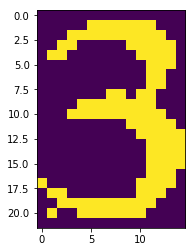

In [46]:
plt.imshow(croped)

In [ ]:
dst = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 111, 0)
dst = cv2.bitwise_not(dst)
plt.imshow(dst, cmap='gray')

In [ ]:
x, y, w, h = bb
dst[y:y+h, x:x+w]

In [ ]:
pts2 = sc.get_points_from_img(croped, simpleto=50)

In [ ]:
image = croped
simpleto = 50
cnts = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
points = np.array(cnts[1][0]).reshape((-1, 2))
if len(cnts[1]) > 1:
    points = np.concatenate([points, np.array(cnts[1][1]).reshape((-1, 2))], axis=0)
points = points.tolist()
step = len(points) / simpleto
points = [points[i] for i in xrange(0, len(points), step)][:simpleto]

In [ ]:
np.sum(croped)/255